In [1]:
import os
print(os.path.abspath('.'))

C:\Users\MSI-NB


In [26]:
#导入数据并查看
import pandas as pd
# mushroom = pd.read_csv('mr_stalkroot_filled.csv')
mushroom = pd.read_csv('mr_filled.csv')
# mushroom = pd.read_csv('mr_cleaned(1).csv')
# mushroom = pd.read_csv('mushrooms.csv')
print("dataset size: ", mushroom.shape)
mushroom.head()

dataset size:  (8111, 19)


,class,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,4,1,4,1,0,1,2,0,2,2,2,5,5,1,3,1,3,5
1,0,4,1,7,1,0,0,2,0,1,2,2,5,5,1,3,2,2,1
2,0,0,1,6,1,0,0,3,0,1,2,2,5,5,1,3,2,2,3
3,1,4,2,6,1,0,1,3,0,2,2,2,5,5,1,3,1,3,5
4,0,4,1,3,0,1,0,2,1,2,2,2,5,5,1,0,2,0,1


In [2]:
from sklearn.preprocessing import LabelEncoder  #标签编码，字符串映射为连续数字
labelencoder = LabelEncoder()
mushroom_2 = mushroom
for col in mushroom_2.columns:
    mushroom_2[col] = labelencoder.fit_transform(mushroom[col])
mushroom_2.head()

,class,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,4,1,4,1,0,1,2,0,2,2,2,5,5,1,3,1,3,5
1,0,4,1,7,1,0,0,2,0,1,2,2,5,5,1,3,2,2,1
2,0,0,1,6,1,0,0,3,0,1,2,2,5,5,1,3,2,2,3
3,1,4,2,6,1,0,1,3,0,2,2,2,5,5,1,3,1,3,5
4,0,4,1,3,0,1,0,2,1,2,2,2,5,5,1,0,2,0,1


In [27]:
mushroom_2 = mushroom

In [28]:
# 分离target
data = mushroom_2.drop(columns = 'class')
labels = mushroom_2[['class']]
data.head()

,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,4,1,4,1,0,1,2,0,2,2,2,5,5,1,3,1,3,5
1,4,1,7,1,0,0,2,0,1,2,2,5,5,1,3,2,2,1
2,0,1,6,1,0,0,3,0,1,2,2,5,5,1,3,2,2,3
3,4,2,6,1,0,1,3,0,2,2,2,5,5,1,3,1,3,5
4,4,1,3,0,1,0,2,1,2,2,2,5,5,1,0,2,0,1


In [29]:
labels.head()

,class
0,1
1,0
2,0
3,1
4,0


In [30]:
# 标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mushroom_std=scaler.fit_transform(data)
print("shape:", mushroom_std.shape)
mushroom_std

shape: (8111, 18)


array([[ 1.19161846, -0.13759884,  0.14063361, ..., -0.65202632,
        -0.25048424,  2.36295977],
       [ 1.19161846, -0.13759884,  1.66969424, ..., -0.00486706,
        -0.98182969, -0.25489465],
       [-1.62192272, -0.13759884,  1.16000736, ..., -0.00486706,
        -0.98182969,  1.05403256],
       ...,
       [-0.91853742, -0.13759884, -0.36905326, ..., -1.29918557,
        -2.4445206 ,  0.39956895],
       [-0.21515213,  1.08214344, -0.36905326, ...,  1.28945146,
        -0.25048424,  0.39956895],
       [ 0.48823317, -0.13759884, -0.36905326, ...,  0.6422922 ,
        -2.4445206 ,  0.39956895]])

In [31]:
# 分成训练集和测试集
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(mushroom_std, labels, test_size = 0.3, random_state = 10)
print("train_data shape:",train_data.shape)
print("test_data shape:",test_data.shape)
print("train_label shape:",train_label.shape)
print("test_label shape:",test_label.shape)
test_data
test_label

train_data shape: (5677, 18)
test_data shape: (2434, 18)
train_label shape: (5677, 1)
test_label shape: (2434, 1)


,class
6213,1
1716,0
7200,0
1131,0
461,0
...,...
4097,1
904,0
6497,1
2314,0


In [32]:
# 转换为tensor
import torch
train_data_t = torch.tensor(train_data, dtype=torch.float32)
test_data_t = torch.tensor(test_data, dtype=torch.float32)
train_label_t = torch.tensor(train_label.values, dtype=torch.float32)
test_label_t = torch.tensor(test_label.values, dtype=torch.float32)

print(train_data_t.shape)
train_data_t

torch.Size([5677, 18])


tensor([[ 1.1916, -1.3573,  1.1600,  ..., -0.0049, -2.4445, -0.2549],
        [ 1.1916,  1.0821, -0.3691,  ..., -0.6520,  1.2122, -0.9094],
        [ 1.1916,  1.0821,  0.1406,  ..., -0.6520, -0.2505,  1.7085],
        ...,
        [-0.9185, -1.3573, -0.3691,  ..., -1.2992,  1.2122, -0.9094],
        [-0.9185, -0.1376, -1.3884,  ...,  1.2895, -0.2505,  1.0540],
        [-0.9185, -0.1376,  1.1600,  ..., -0.6520, -2.4445, -0.2549]])

In [9]:
test_label_t.shape[0]

2434

In [33]:
# 定义神经网络（单层MLP）
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F

device = "cuda:0" if torch.cuda.is_available() else "cpu"

class ANN(nn.Module):
    def __init__(self, feature_num, hidden_num, output_num):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(feature_num, hidden_num)
        self.fc2 = nn.Linear(hidden_num, output_num)
        
    def forward(self, x):
        hid = self.fc1(x)
        hid = F.relu(hid)
        out = self.fc2(hid)
        out = torch.sigmoid(out)
        return out

train_data_t = train_data_t.to(device)
train_label_t = train_label_t.to(device)
test_data_t = test_data_t.to(device)
test_label_t = test_label_t.to(device)

epoch_num = 60
# 训练两次，一次隐藏层层数为60，一次为20
aloss = np.zeros(epoch_num)
atrainAcc = np.zeros(epoch_num)
atestAcc = np.zeros(epoch_num)
bloss = np.zeros(epoch_num)
btrainAcc = np.zeros(epoch_num)
btestAcc = np.zeros(epoch_num)

# 计算准确率
def showAccuracy(x,y,module):
    out = module(x)
    n = y.shape[0]
    acc = (out.ge(0.5).type(torch.float32) == y).sum().item()
    return acc / n


In [34]:
# 训练

module = ANN(feature_num = 18, hidden_num = 60,output_num = 1).to(device)
optimizer = optim.Adam(module.parameters(), lr=0.01)
loss_function = nn.BCELoss()

for epoch in range (epoch_num):
    optimizer.zero_grad()
    outputs = module(train_data_t)
    loss = loss_function(outputs, train_label_t)
    loss.backward()
    optimizer.step()
    train_loss = loss.item()
    aloss[epoch] = train_loss # 存储
    trainAcc = showAccuracy(train_data_t, train_label_t, module)
    testAcc = showAccuracy(test_data_t, test_label_t, module)
    atrainAcc[epoch] = trainAcc # 存储
    atestAcc[epoch] = testAcc # 存储
    print('epoch %d ,loss %.4f'%(epoch + 1,train_loss)+', train acc %.4f, test acc %.4f'
                  %(trainAcc,testAcc))
    

epoch 1 ,loss 0.6720, train acc 0.7434, test acc 0.7535
epoch 2 ,loss 0.5954, train acc 0.8564, test acc 0.8570
epoch 3 ,loss 0.5299, train acc 0.8971, test acc 0.8891
epoch 4 ,loss 0.4730, train acc 0.8962, test acc 0.8862
epoch 5 ,loss 0.4237, train acc 0.8947, test acc 0.8862
epoch 6 ,loss 0.3813, train acc 0.8936, test acc 0.8833
epoch 7 ,loss 0.3456, train acc 0.8915, test acc 0.8813
epoch 8 ,loss 0.3161, train acc 0.8908, test acc 0.8804
epoch 9 ,loss 0.2920, train acc 0.8917, test acc 0.8821
epoch 10 ,loss 0.2724, train acc 0.8931, test acc 0.8850
epoch 11 ,loss 0.2560, train acc 0.8971, test acc 0.8907
epoch 12 ,loss 0.2419, train acc 0.9019, test acc 0.8952
epoch 13 ,loss 0.2294, train acc 0.9068, test acc 0.9010
epoch 14 ,loss 0.2183, train acc 0.9140, test acc 0.9043
epoch 15 ,loss 0.2081, train acc 0.9181, test acc 0.9137
epoch 16 ,loss 0.1989, train acc 0.9257, test acc 0.9174
epoch 17 ,loss 0.1907, train acc 0.9304, test acc 0.9228
epoch 18 ,loss 0.1834, train acc 0.9362,

In [11]:
outputs = module(train_data_t)
print(outputs)

NameError: name 'module' is not defined

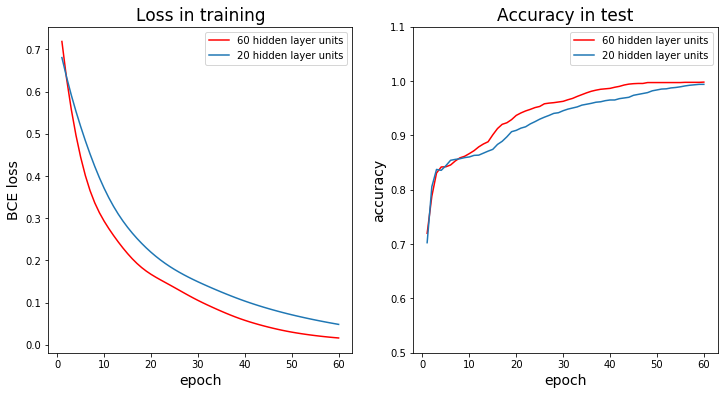

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)   

plt.plot(range(1,61), aloss, label='60 hidden layer units', color = 'r')
plt.plot(range(1,61), bloss, label='20 hidden layer units', color = '#1f77b4')
plt.xlabel('epoch',fontsize=14)
plt.ylabel('BCE loss',fontsize=14)
plt.title('Loss in training',fontsize=17)
plt.legend()

ax2 = plt.subplot(1,2,2)

plt.plot(range(1,61), atestAcc, label='60 hidden layer units', color = 'r')
plt.plot(range(1,61), btestAcc, label='20 hidden layer units', color = '#1f77b4')
plt.xlabel('epoch',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.ylim(0.5,1.1)
plt.title('Accuracy in test',fontsize=17)
plt.legend()
#plt.savefig('./ANN_results.jpg')
plt.show()

In [20]:
mushroom_std
# 转换为tensor
import torch

test_data_t = torch.tensor(mushroom_std, dtype=torch.float32)
test_label_t = torch.tensor(labels.values, dtype=torch.float32)

print(test_data_t.shape)
test_data_t

torch.Size([2480, 19])


tensor([[ 1.1705,  1.0920, -1.5044,  ...,  0.2308, -2.3909,  1.7582],
        [ 1.1705,  1.0920, -0.9003,  ...,  0.2308,  0.4931,  0.9795],
        [-0.9893,  1.0920,  2.1202,  ..., -3.7440,  1.4544, -1.3563],
        ...,
        [-0.9893, -0.5839,  0.3079,  ..., -5.0689, -2.3909,  0.2009],
        [ 0.0906,  1.0920,  0.3079,  ...,  0.2308,  0.4931,  0.2009],
        [ 1.1705, -0.5839,  0.3079,  ..., -1.0941, -2.3909,  0.2009]])

In [24]:
test_data_t = test_data_t.to(device)
test_label_t = test_label_t.to(device)
testAcc = showAccuracy(test_data_t, test_label_t, module)


In [25]:
testAcc

0.6971774193548387